In [1]:
from IPython.display import display, HTML
display(HTML("""<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{fontsize:12pt;padding:5px;}
table.dataframe{font-size:12px;}))
</style>
"""))

<font size="5" color="red">ch12 데이터 시각화</font>

- 시각화 라이브러리 : matplotlib, seaborn(데이터시각화), folium(지도시각화)
- matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
- seaborn : matplotlib기반으로 다양한 색, 테마, 차트 기능과 groupby 기능 포함된 라이브러리

# 1절 matplotlib

- https://pypi.org/project/matplotlib
- https://matplotlib.org/stable/api/index

In [2]:
import matplotlib.pyplot

matplotlib.__version__

'3.7.0'

## 1.1 패키지 import 및 기본 설정

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 선명도
%config InlineBackend.figure_format = 'retina'  
# 한글 설정
plt.rc('font', family = 'Malgun Gothic')  # windows
plt.rc('axes', unicode_minus = False)  # 축의 - 부분 깨짐 방지
# plt.rc('font', family = 'AppleGothic')  #Mac
# plt.rcParams['font'.family] = 'Malgun Gothic'  # Mac

# warning(경고) 안보이게



## 1.2 그래프 그리기

- matplotlib으로 그래프 그리기 위한 단계
    1. 데이터 준비
    2. 그래프 생성
    3. 그래프 함수로 그리기
    4. 그래프 커스터마이징
    5. 그래프 출력 및 저장

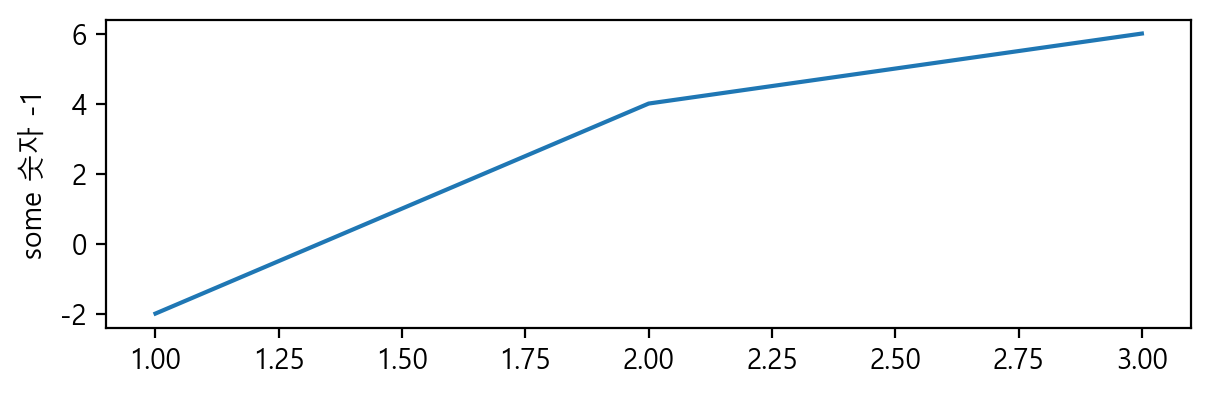

In [10]:
x = [1, 2, 3]  # 1. 데이터 준비
y = [-2, 4, 6]

plt.figure(figsize = (7, 2))  # 2. 그래프 객체 생성
plt.plot(x, y)  # 3. 그래프 함수로 그리기
plt.ylabel('some 숫자 -1')  # 4. 그래프 커스터마이징
plt.show()  # 5. 그래프 출력

## 1.3 그래프 영역 나누기

### 1) subplot() 함수로 서브플롯 추가

In [11]:
import numpy as np

x = np.arange(0, 10, 0.01)
len(x)

1000

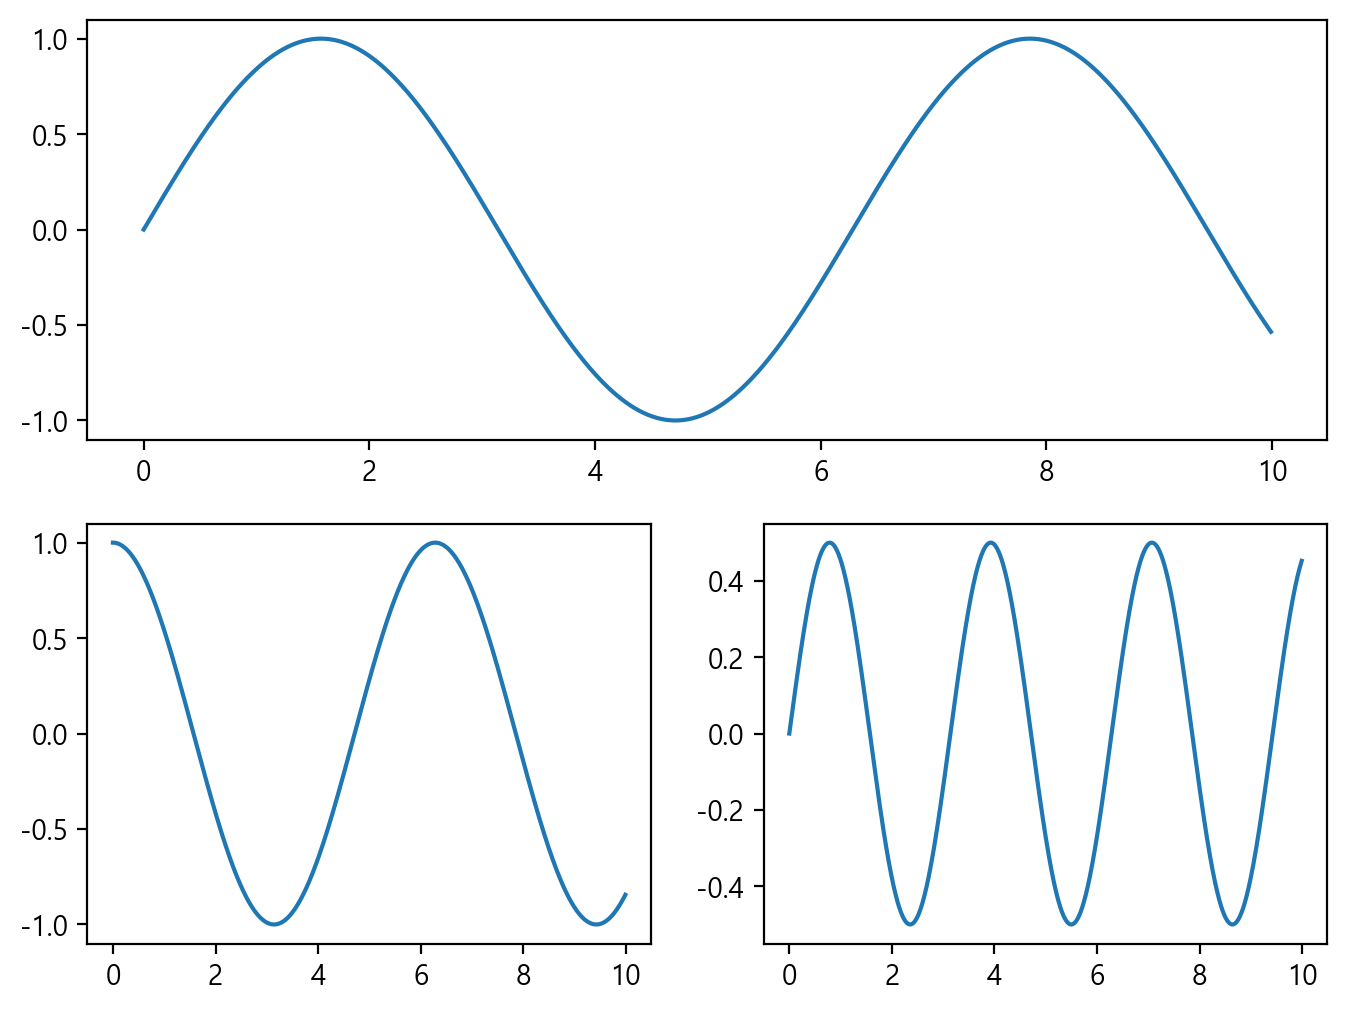

In [12]:
plt.figure(figsize = (8, 6))
plt.subplot(2, 1, 1); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3); plt.plot(x, np.cos(x))
plt.subplot(224); plt.plot(x, np.sin(x) * np.cos(x))

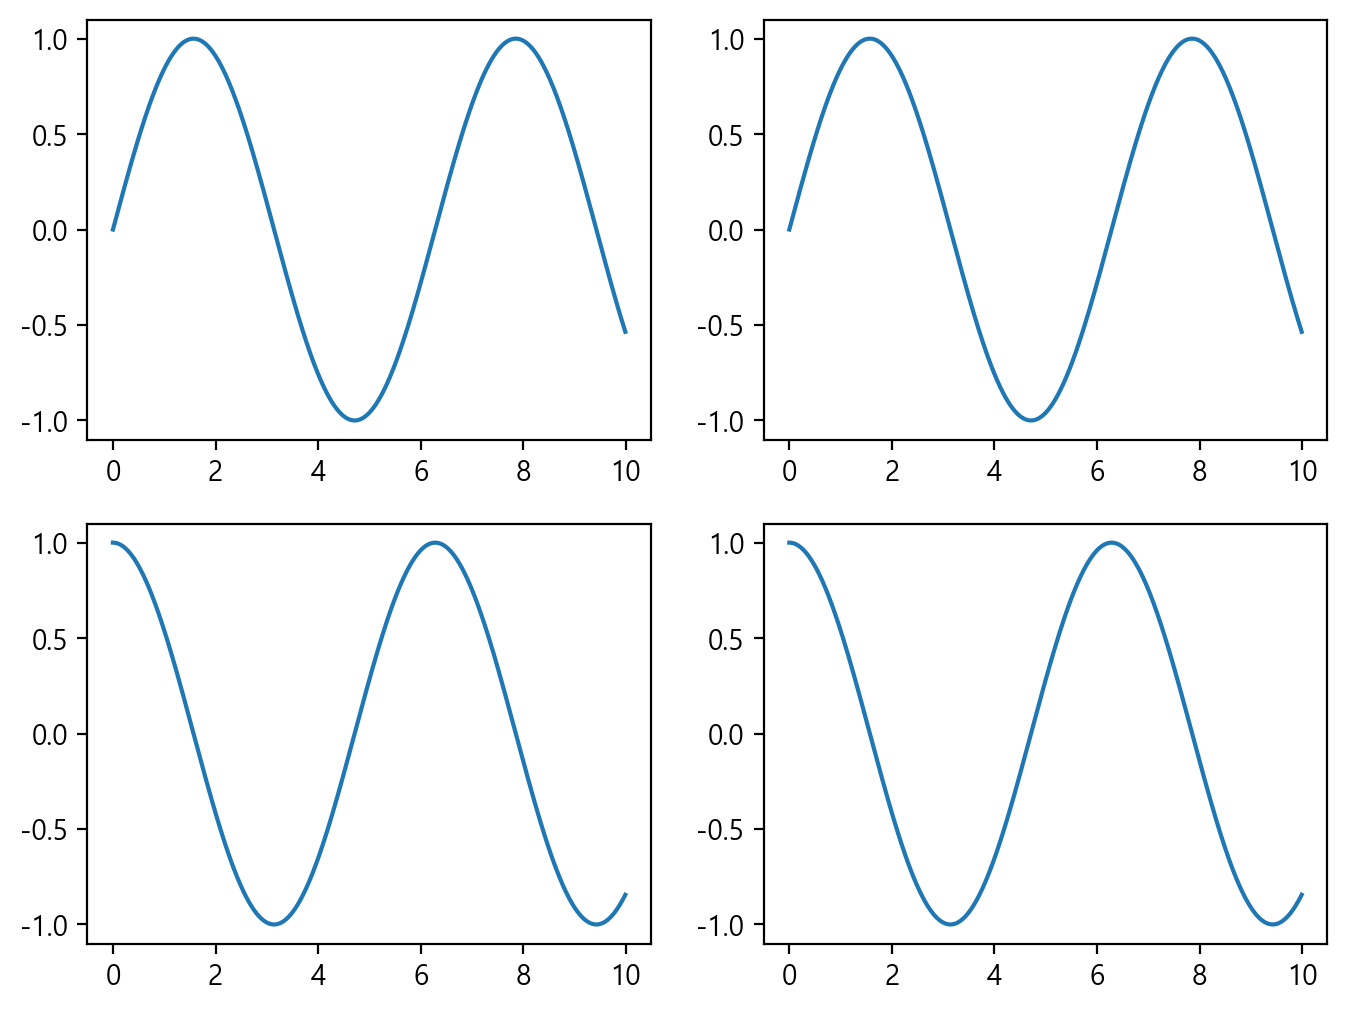

In [13]:
plt.figure(figsize = (8, 6))
plt.subplot(2, 2, 1); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 2); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3); plt.plot(x, np.cos(x))
plt.subplot(2, 2, 4); plt.plot(x, np.cos(x))

### 2) subplots() 함수로 서브플롯 추가

- https://wikidocs.net/92085 (교안 14page)

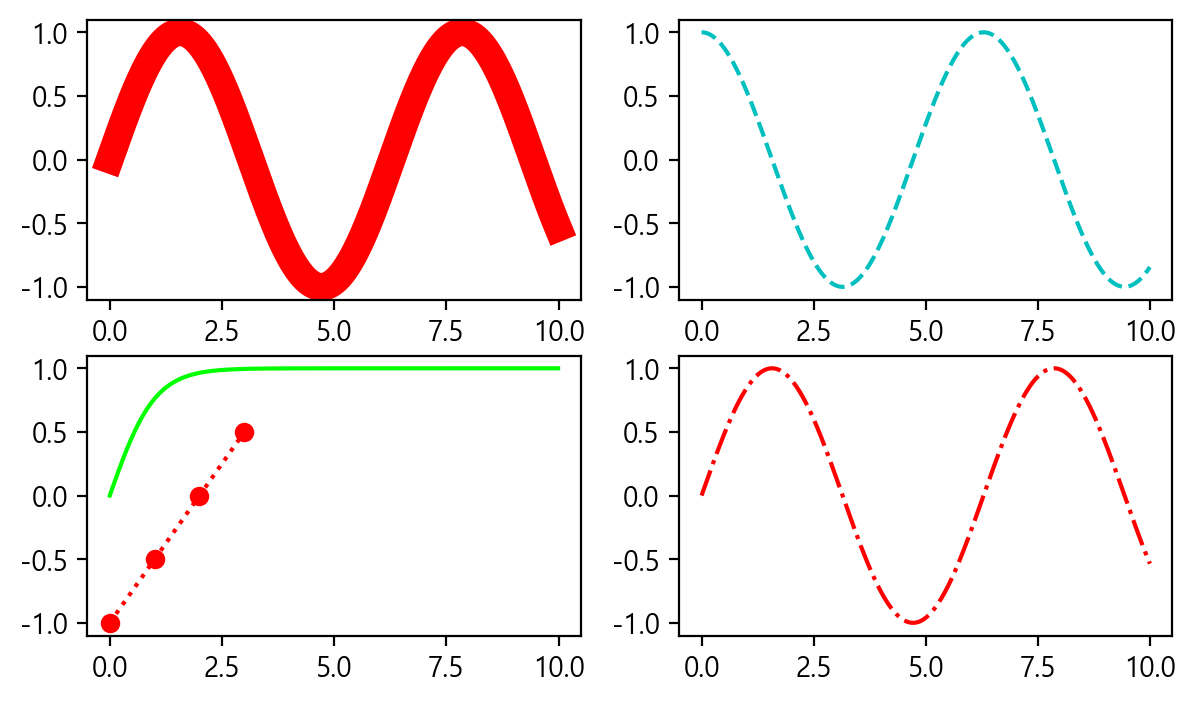

In [14]:
# 2행 2열 서브플롯

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (7, 4))
axes[0, 0].plot(x, np.sin(x), 'r', linewidth = 10)
axes[0, 1].plot(x, np.cos(x), 'c--')  # color = 'c', linestyle = ':', '--', '-'
axes[1, 0].plot([0, 1, 2, 3], [-1, -0.5, 0, 0.5], 'ro:')  # color = 'r', marker = 'o'
axes[1, 0].plot(x, np.tanh(x), '#00FF00')
axes[1, 1].plot(x, np.sin(x), 'r-.')
plt.show()

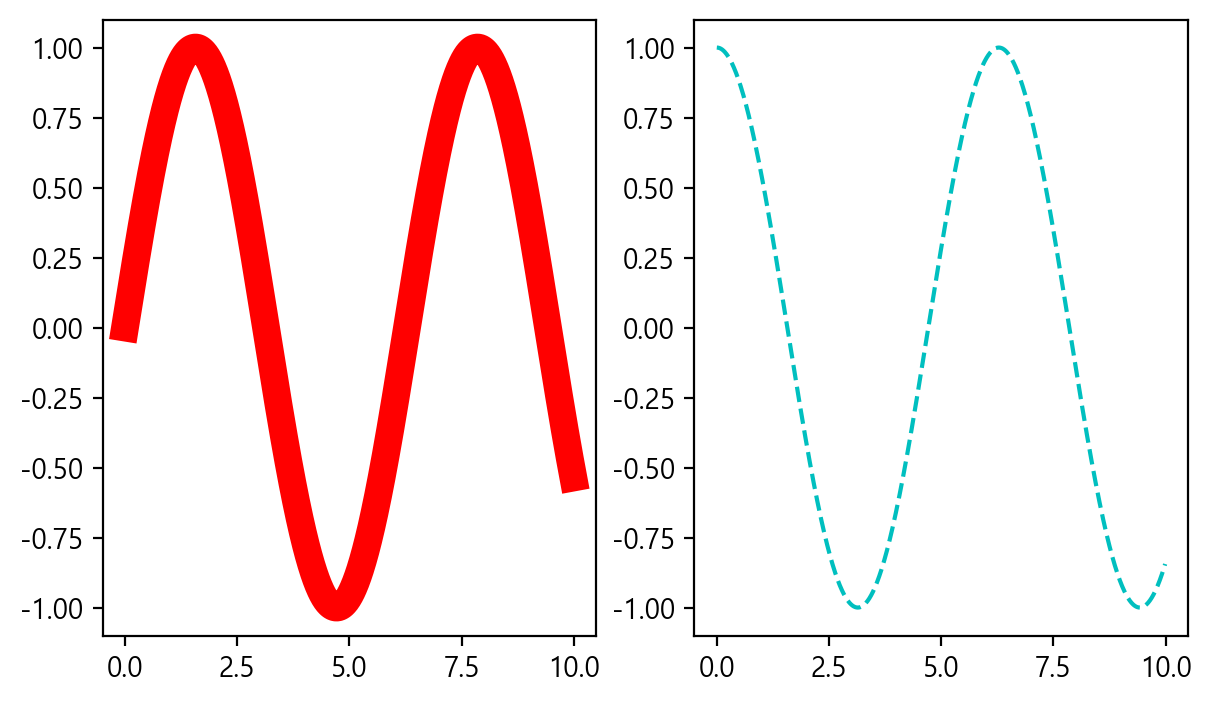

In [15]:
# 1행 2열 서브플롯

fig, axes = plt.subplots(ncols = 2, figsize = (7, 4))
axes[0].plot(x, np.sin(x), 'r', linewidth = 10)
axes[1].plot(x, np.cos(x), 'c--')  # color = 'c', linestyle = ':', '--', '-'

### 3) pandas.DataFrame.plot()

- plt.plot(x, y, fmt)
- df.plot(x = 열이름, y = 열이름, kind = 'line', figsize, title, xlim, ylim, ...)
    * kind : line(기본값), scatter(점도표), bar, barh, box, pie, density, ...
    * xlim, ylim : list / tuple

In [37]:
from seaborn import load_dataset

iris = load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
84,5.4,3.0,4.5,1.5,versicolor


범례사용 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot (교안 20page)

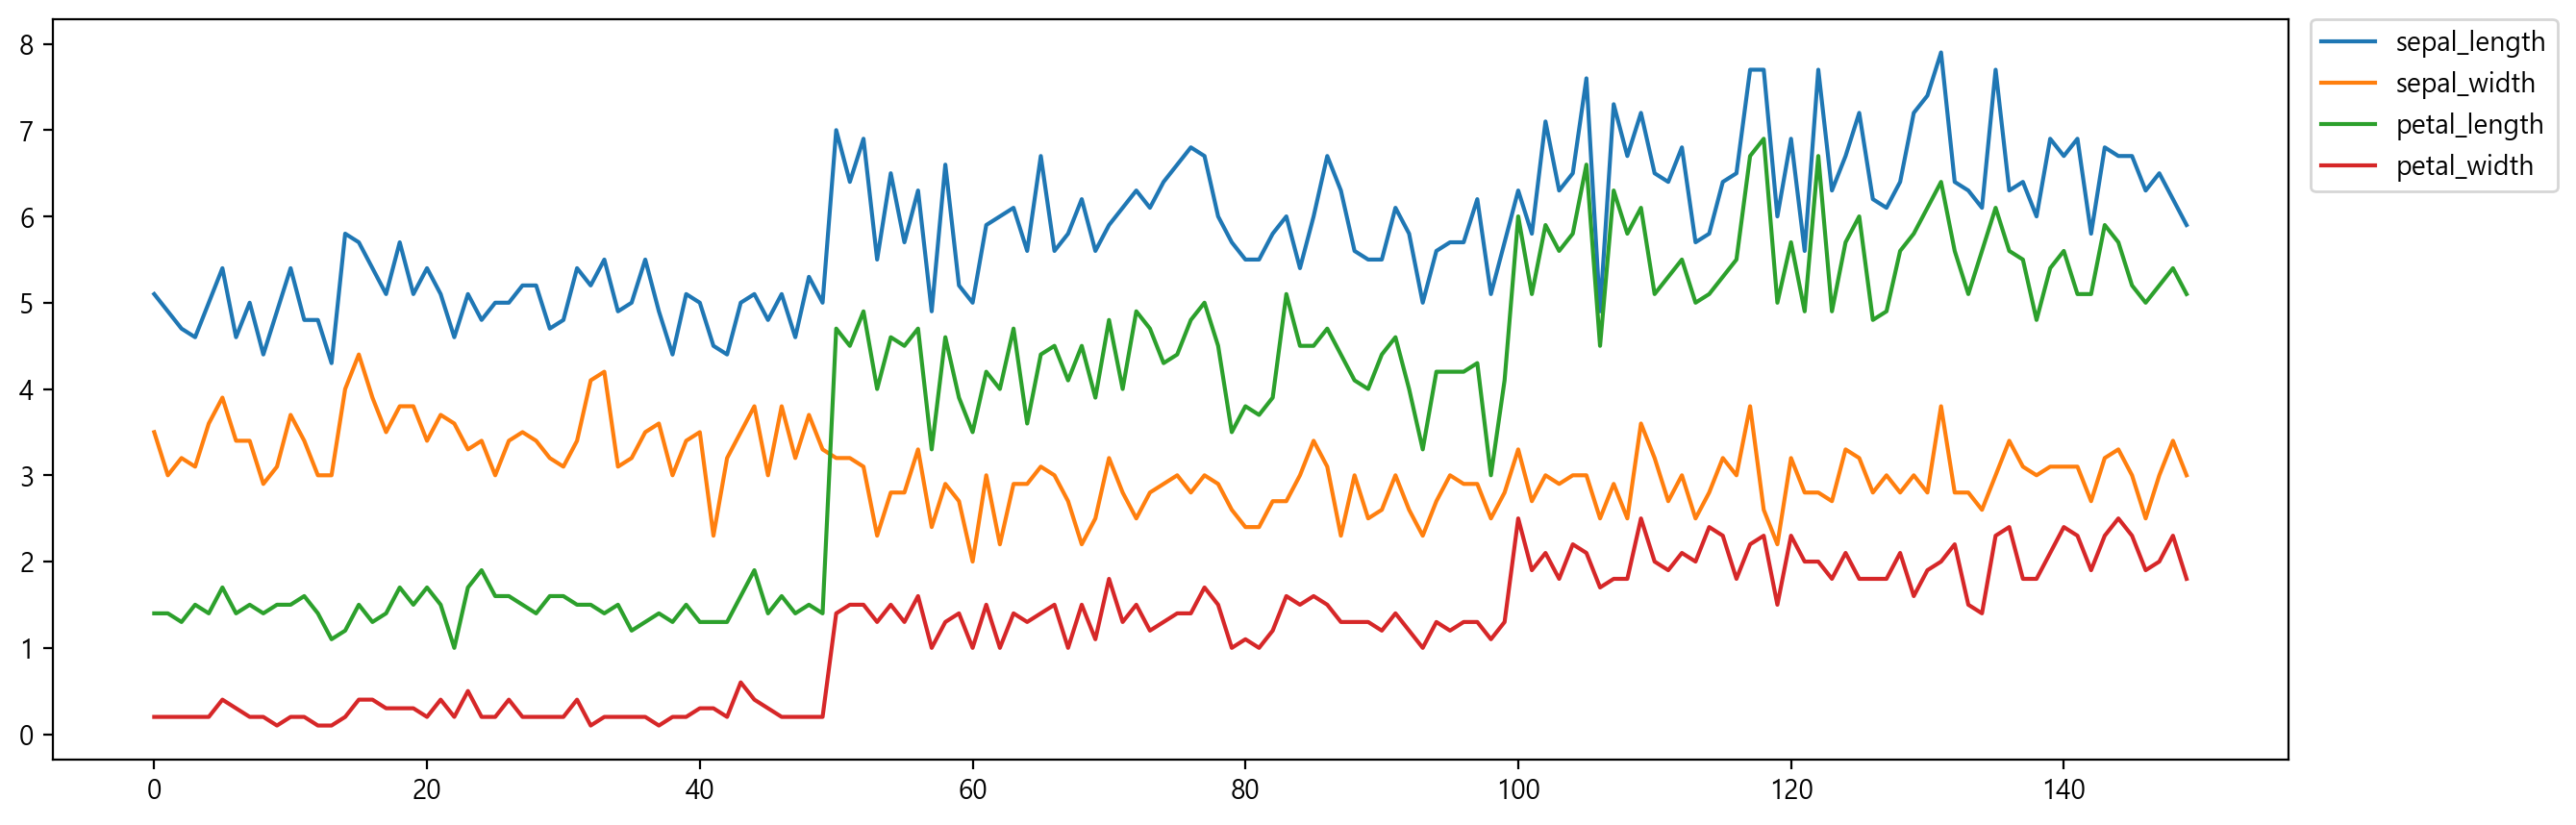

In [17]:
iris.plot(kind = 'line', figsize = (15, 5))
# g.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.legend(bbox_to_anchor = (1.01, 1), loc = 2, borderaxespad = 0.)
#sns.move_legend(g, "upper left", bbox_to_anchor = (1, 1))
# plt.savefig('data/ch12_iris.jpg')
plt.show()


In [18]:
iris.corr(numeric_only = True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


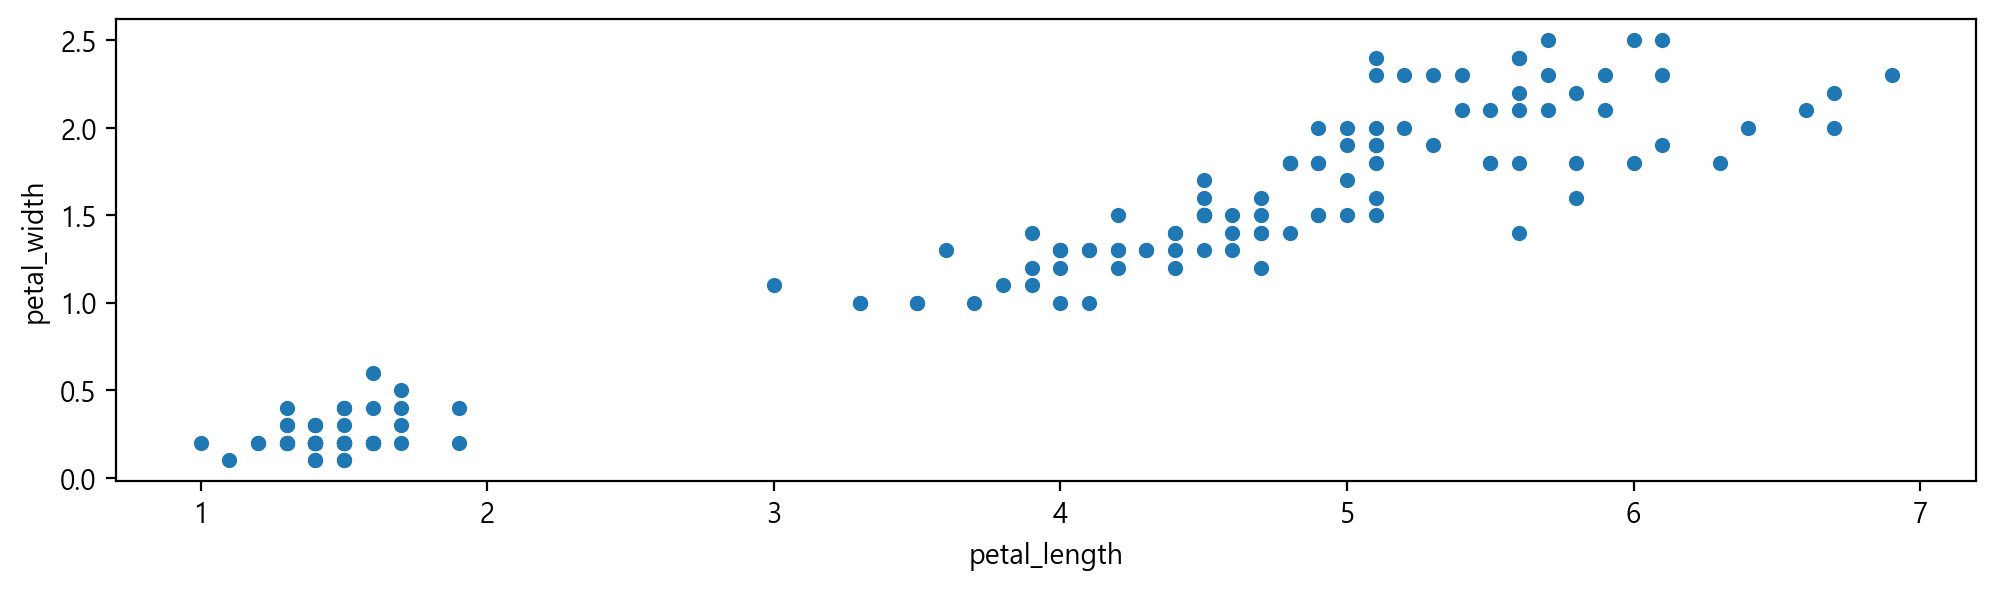

In [19]:
iris.plot(x = 'petal_length', y = 'petal_width', kind = 'scatter', figsize = (12, 3))
plt.show()

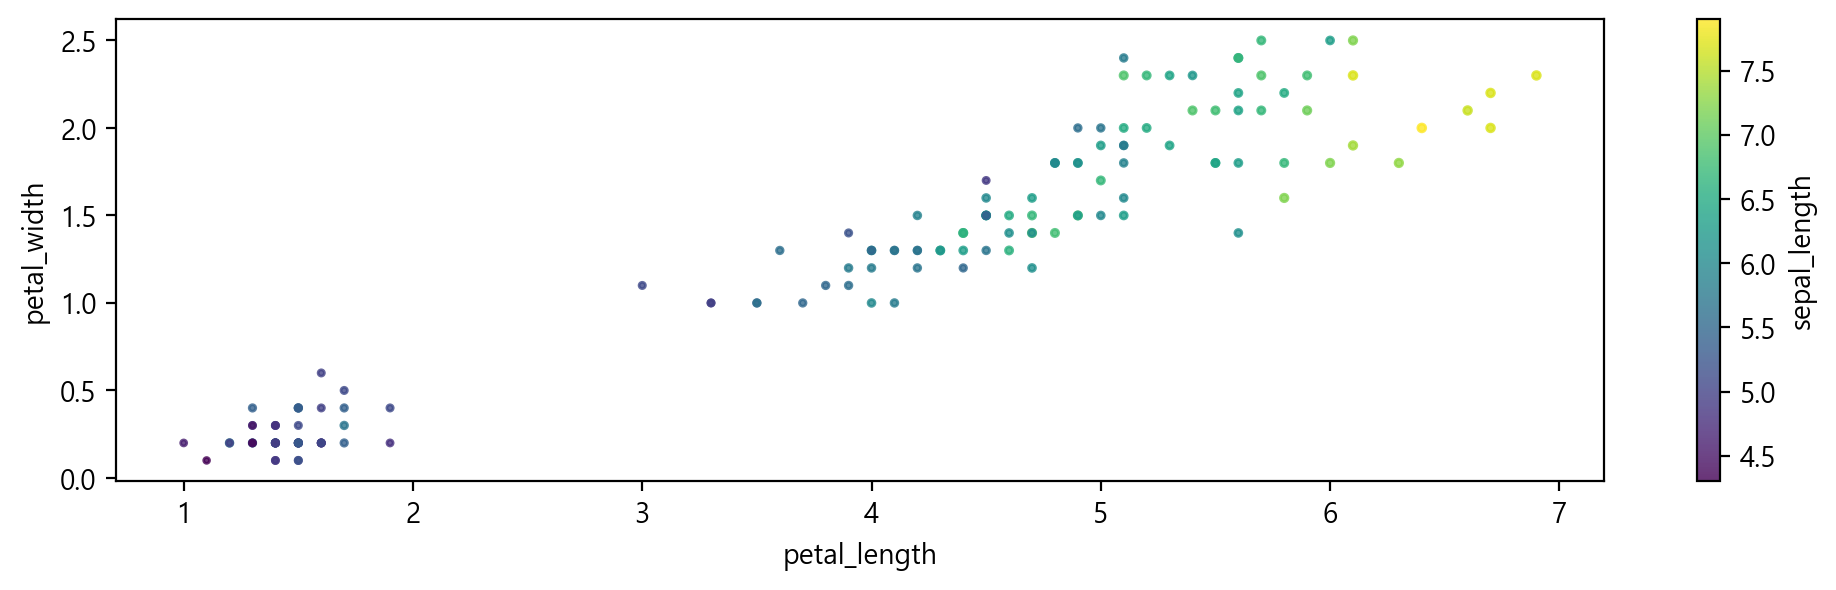

In [20]:
iris.plot(kind = 'scatter',
         x = 'petal_length',
         y = 'petal_width',
         figsize = (12, 3),
         s = 'sepal_length',  # size
         c = 'sepal_length',  # color
         alpha = .8)  # 0<= 투명도 <= 1 
plt.show()

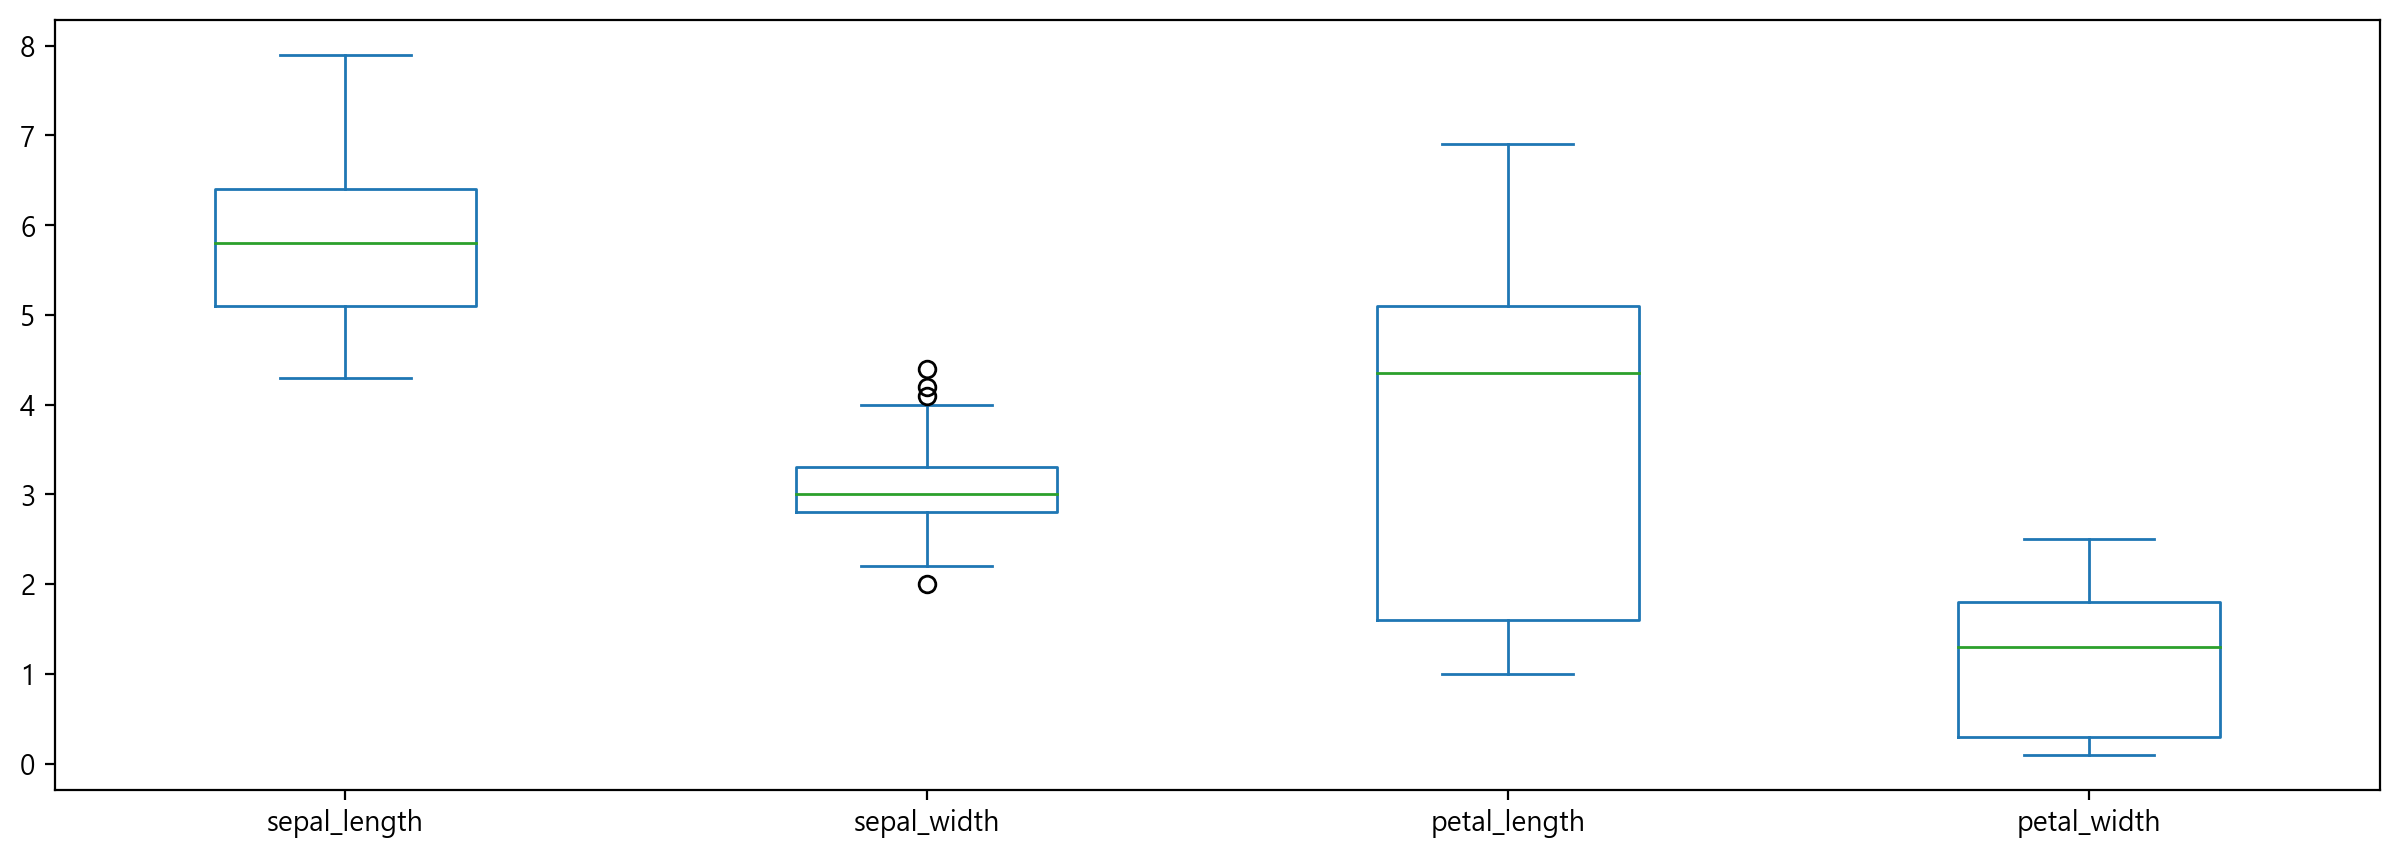

In [21]:
# 모든 열의 boxplot(이상치 여부, q1, q2, q3, min, max)

iris.plot(kind = 'box', figsize = (15, 5))
plt.show()

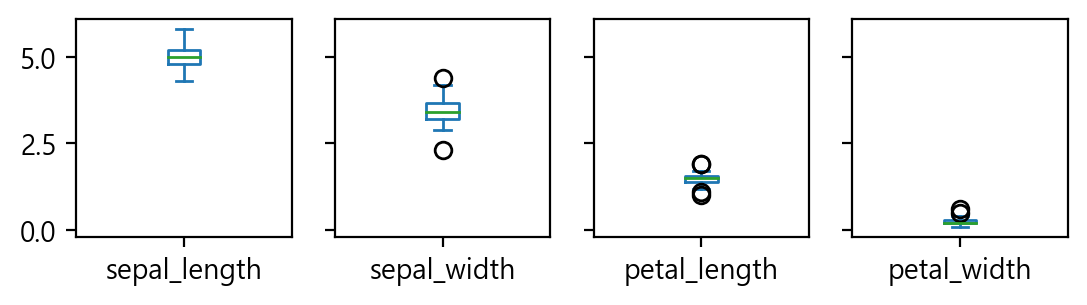

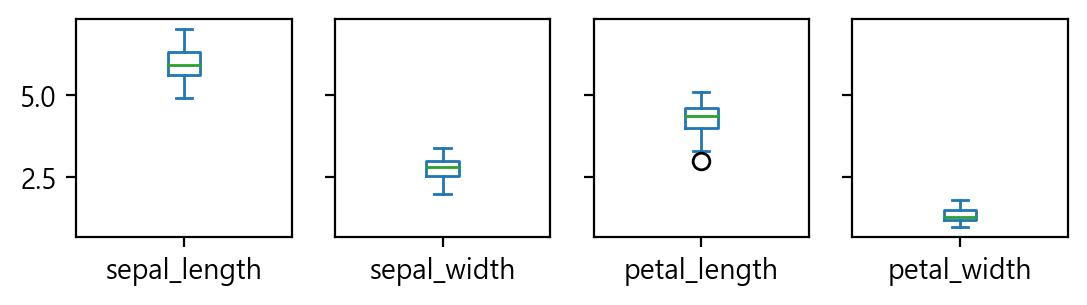

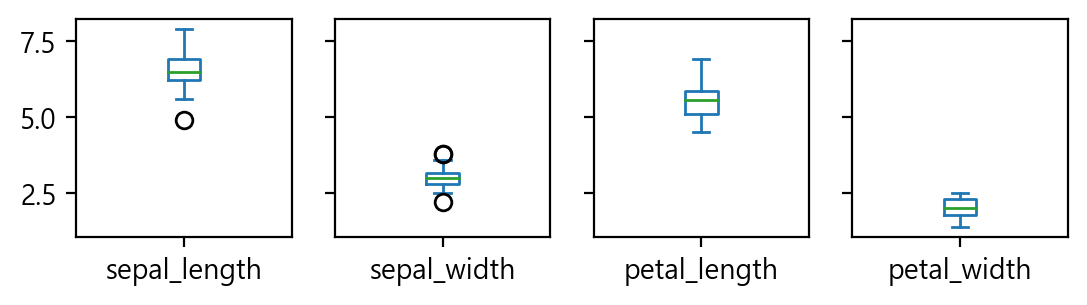

In [22]:
# 종별 boxplot

iris.groupby('species').plot(kind = 'box',
                            subplots = True,
                            layout = (3, 4),
                            sharey = True,  # 축공유
                            )
plt.show()

## 1.4 다양한 그래프 그리기

- pyplot 함수들 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html (교안 16page)

### 1) plt.scatter() : 산점도

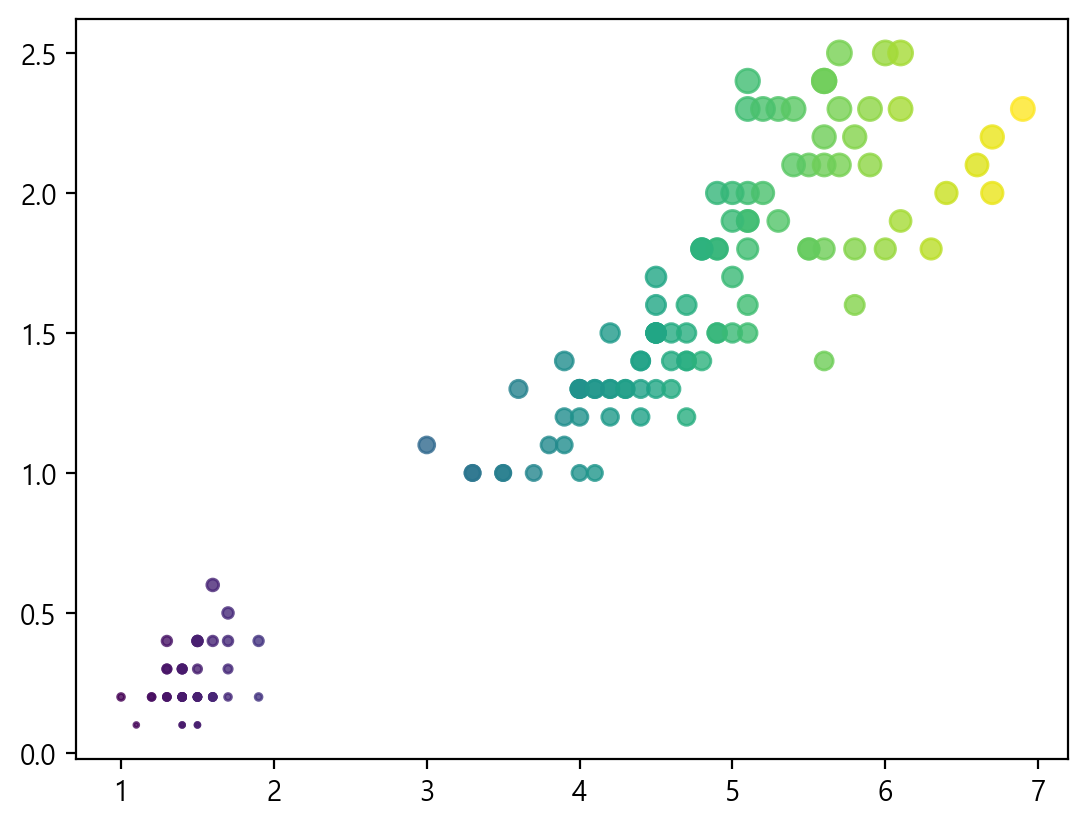

In [23]:
plt.scatter(iris.petal_length, iris.petal_width,
            s = iris.petal_width * 30,  # size
            c = iris.petal_length * 20,  # color
            alpha = .8)

### 2) boxplot (단점 : 분포를 알 수 없음), violinplot()

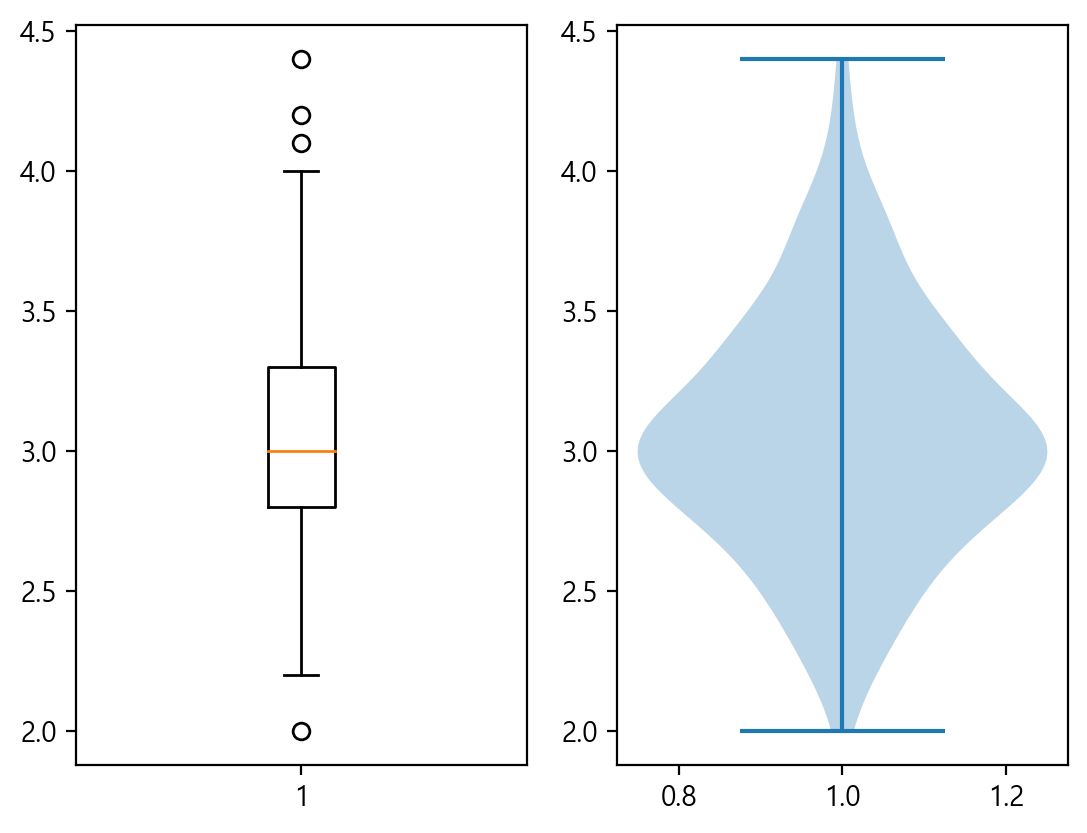

In [24]:
fig, axes = plt.subplots(ncols = 2)
axes[0].boxplot(iris.sepal_width)
axes[1].violinplot(iris.sepal_width)
plt.show()

### 3) bar(), barh(), axvline(수직선), axhline(수평선)

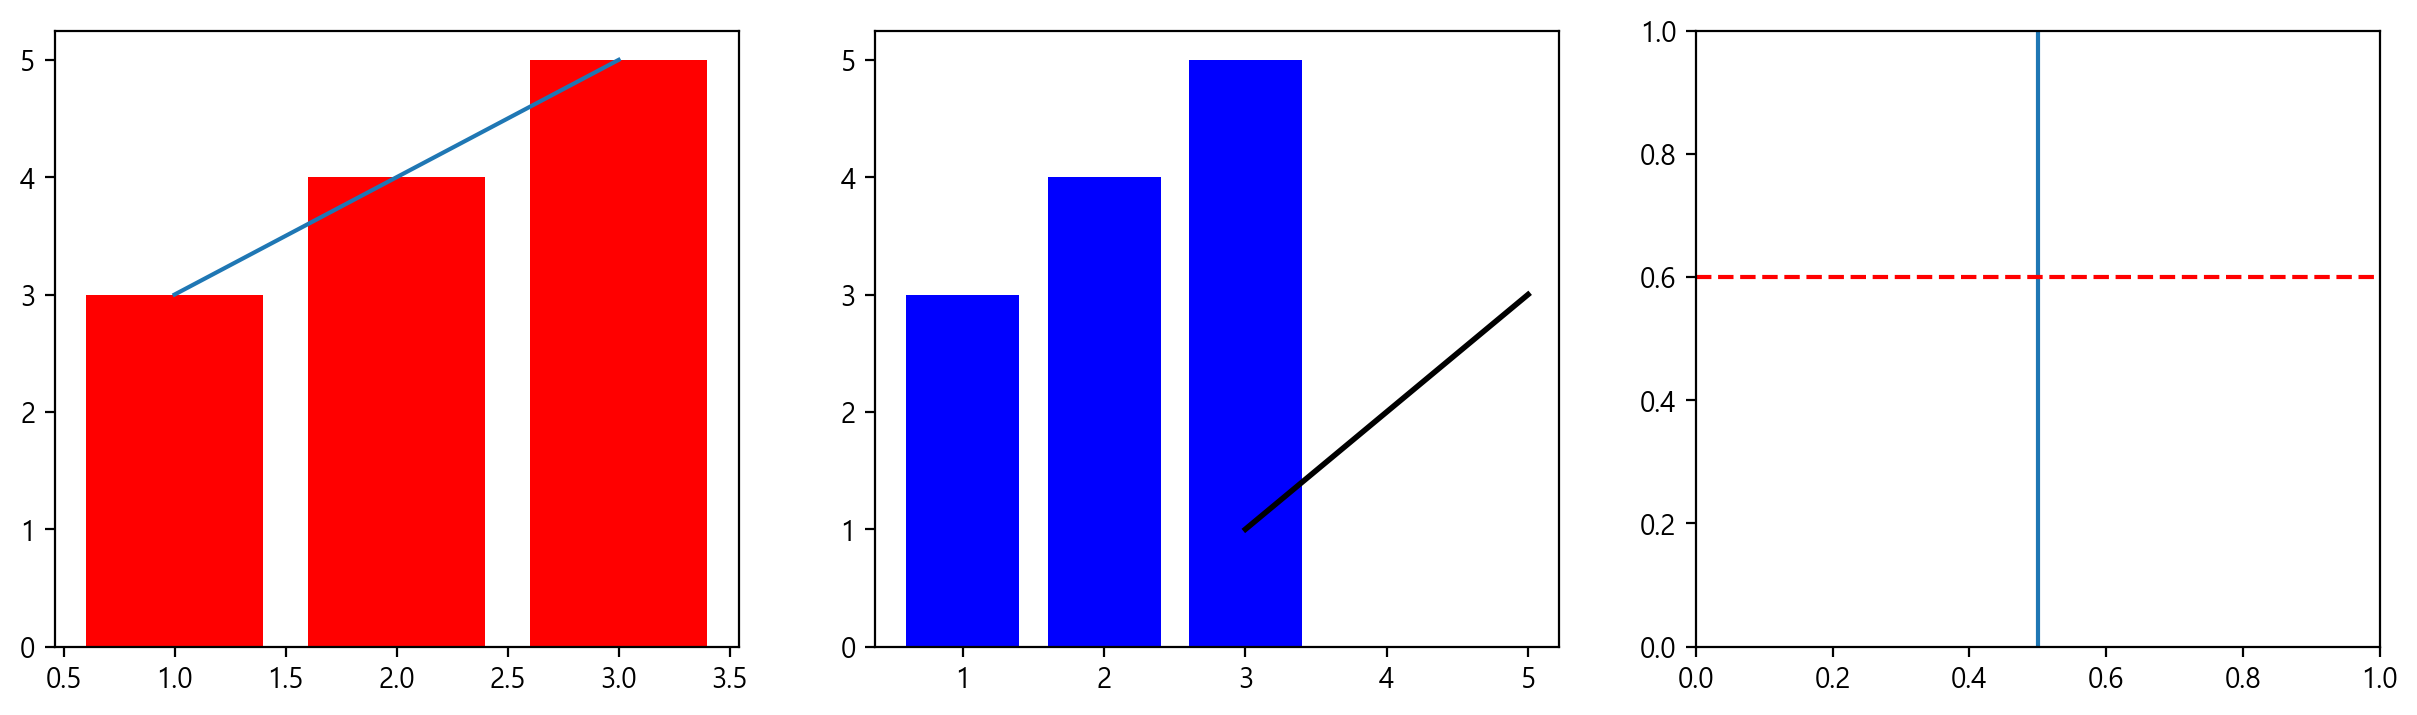

In [25]:
x = [1, 2, 3]
y = [3, 4, 5]
fig, axes = plt.subplots(ncols = 3, figsize = (15, 4))
axes[0].bar(x, y, color = 'r')
axes[0].plot(x, y)
axes[1].bar(x, y, color = 'b')
axes[1].plot(y, x, 'k', linewidth = 2)  # k : black
axes[2].axvline(0.5)
axes[2].axhline(0.6, c = 'r', linestyle = '--')

### 4) hist (도수분포표; histogram)

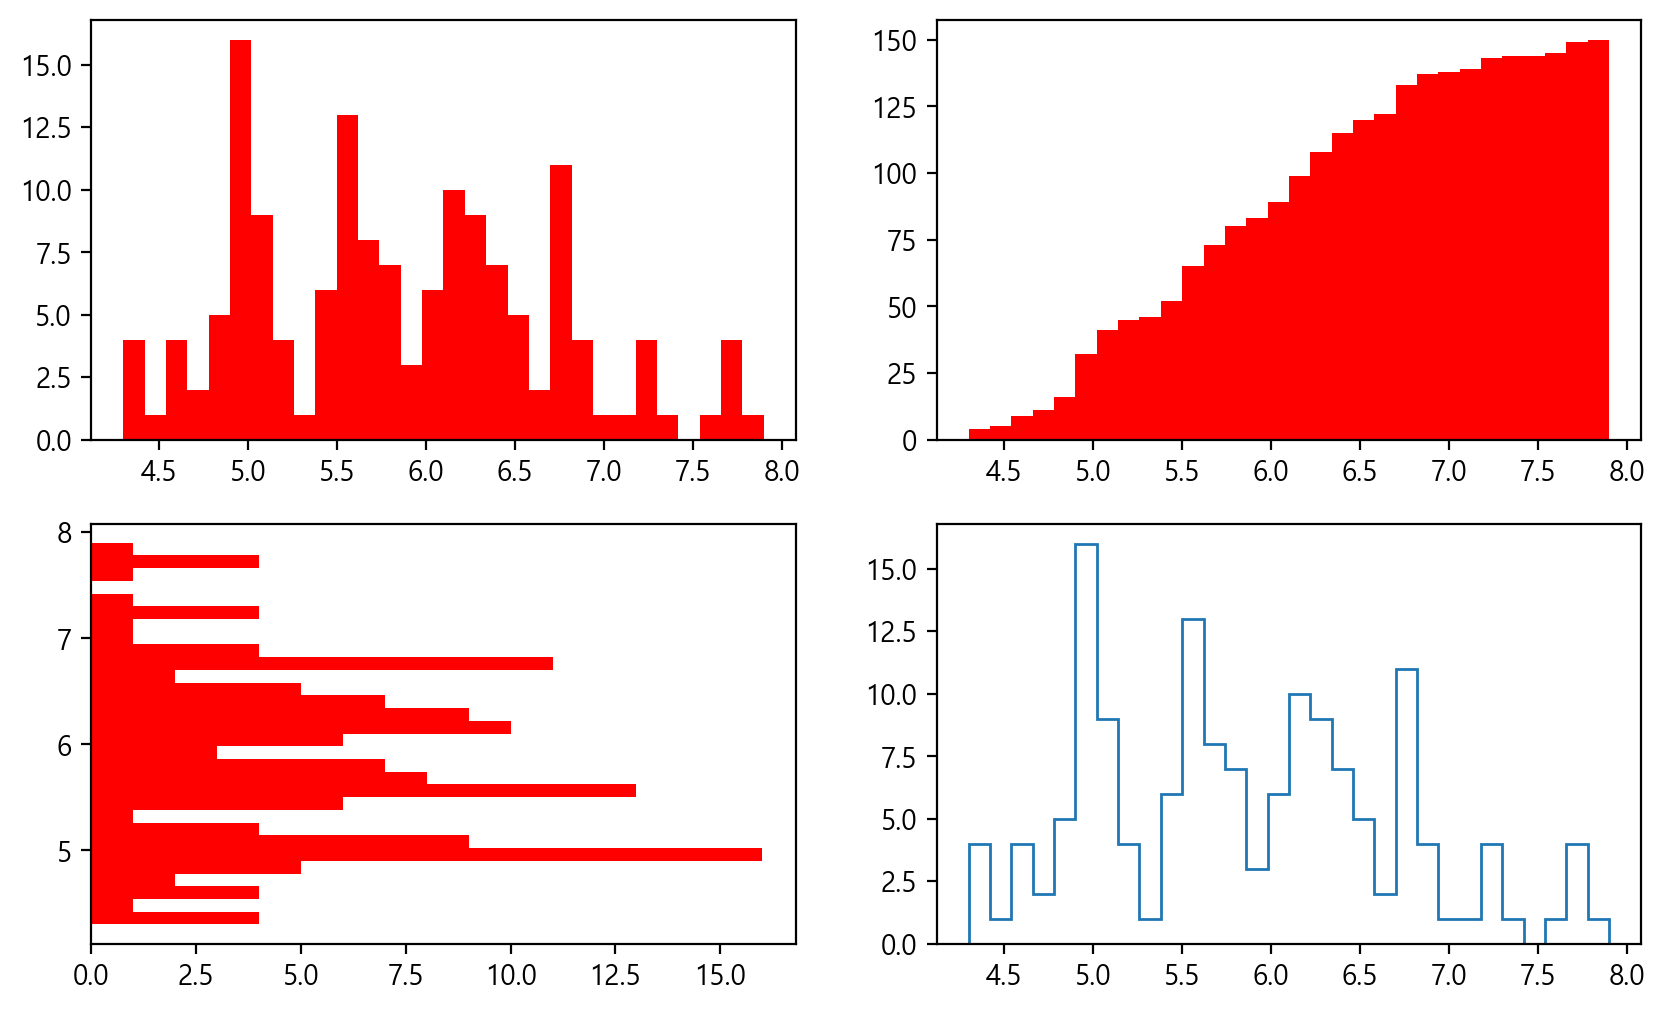

In [38]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 6))
axes[0, 0].hist(iris.sepal_length, bins = 30, color = 'r')  # 히스토그램(도수분포표)
axes[0, 1].hist(iris.sepal_length, bins = 30, color = 'r', cumulative = True)  # 누적히스토그램
axes[1, 0].hist(iris.sepal_length, bins = 30, color = 'r', orientation = 'horizontal')  # 수평히스토그램
axes[1, 1].hist(iris.sepal_length, bins = 30, histtype = 'step')  
plt.show()

## 1.5 그래프 커스터마이징

### 1) linestyle, linewidth, color, marker, ... (plot의 매개변수로 지정)

### 2) text(), annotate()

- https://matplotlib.org/api/axes_api.html#text-and-annotations (교안 29page)

In [39]:
# 개별 폰트 설정을 위한 방법

from matplotlib.font_manager import FontProperties

# 폰트ttf파일 (네이버폰트, 구글폰트 등에서 다운로드하거나 pc의 폰트파일)
font_path = 'C:/ai_x/source/01_python/data/font/BlackHanSans-Regular.ttf'
font_prop = FontProperties(fname = font_path, size = 30)

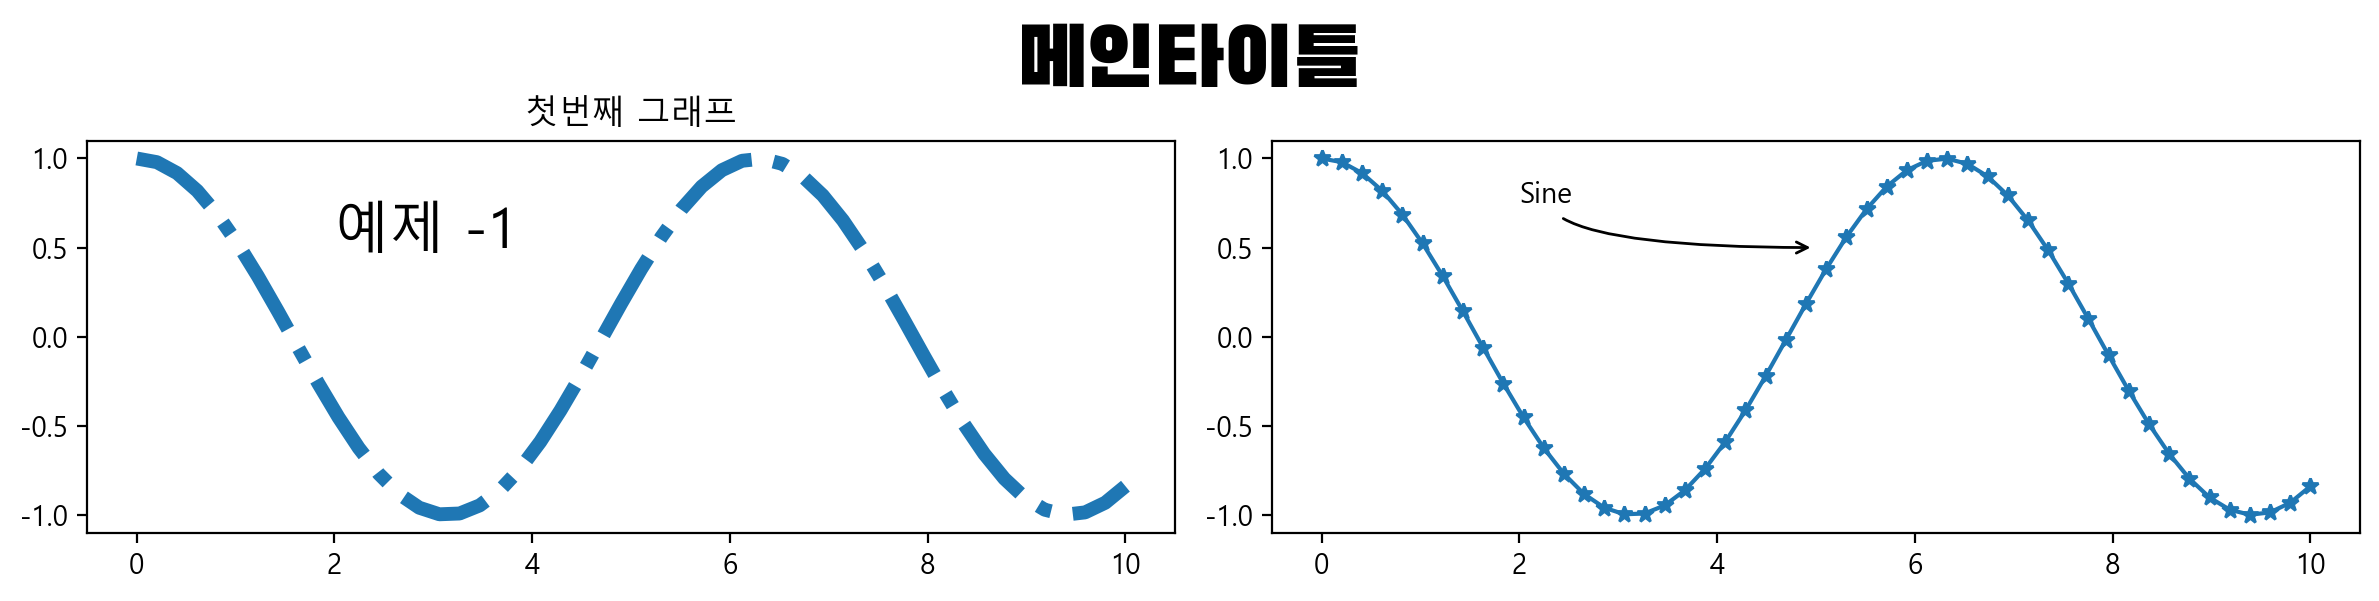

In [41]:
import numpy as np

x = np.linspace(0, 10)  # num = 50
y = np.cos(x)

fig, axes = plt.subplots(1, 2, figsize = (12, 3))
axes[0].plot(x, y, linewidth = 5, linestyle = '-.')
axes[0].text(2, 0.5, '예제 -1', fontsize = 20)
axes[0].set_title('첫번째 그래프')
axes[1].plot(x, y, marker = '*')
axes[1].annotate('Sine', xytext = (2, 0.75),  # 글자가 있을 좌표 위치(좌하)
                 xy = (5, 0.5),  # 화살표가 가리킬 좌표 위치
                 arrowprops = dict(arrowstyle = '->',
                                   connectionstyle = 'angle3')  # angle(꺾은선), arc(직선), ...
                 )
plt.tight_layout(rect = [0, 0, 1, 0.9])  # left, bottom, right, top : 경계의 상대적 비율
plt.suptitle('메인타이틀', fontproperties = font_prop)
plt.show()

### 3) 수학기호

- https://matplotlib.org/users/mathtext.html 교안 (30page)

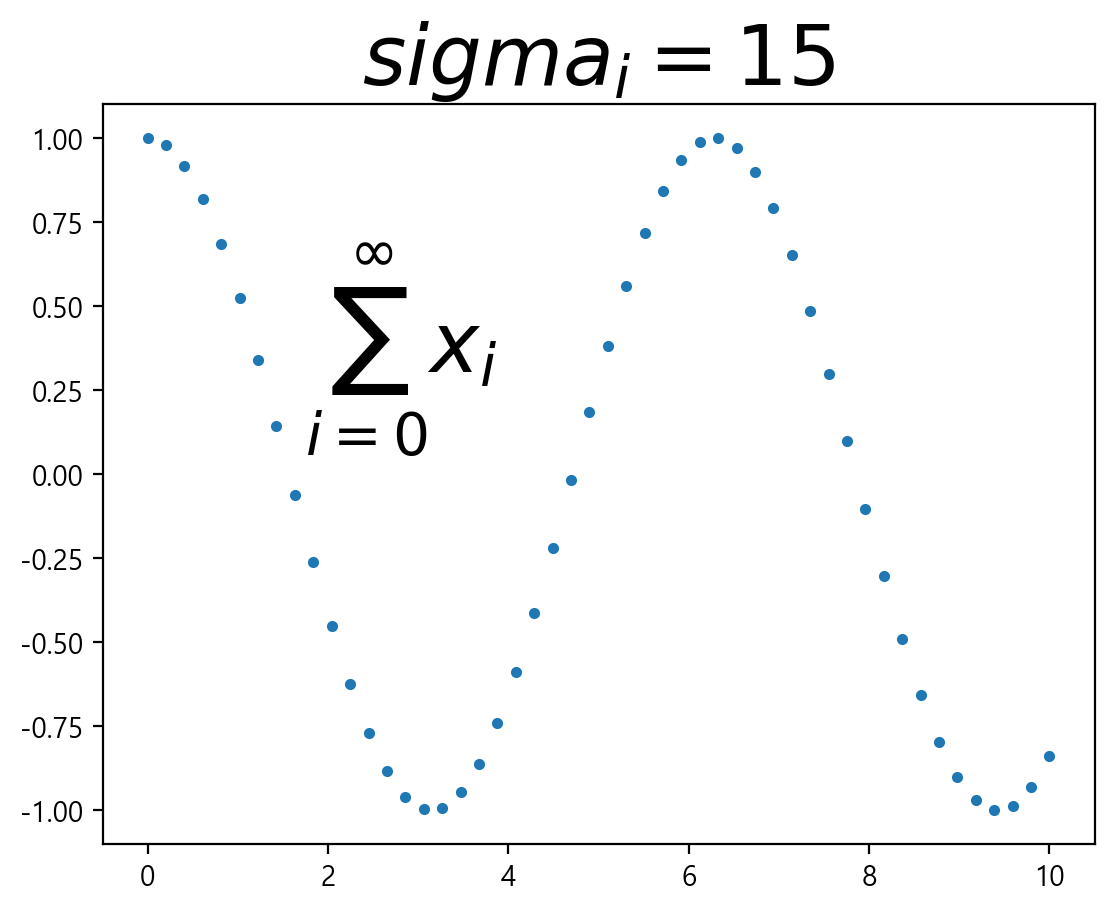

In [48]:
plt.scatter(x, y, marker = '.')
plt.title(r'$sigma_i = 15$', fontsize = 30)
plt.text(1.75, 0.3, r'$\sum_{i = 0}^\infty x_i$', fontsize = 30)
plt.show()

### 4) 축과 눈금

- https://matplotlib.org/3.1.0/api/axis_api.html (교안 33page)

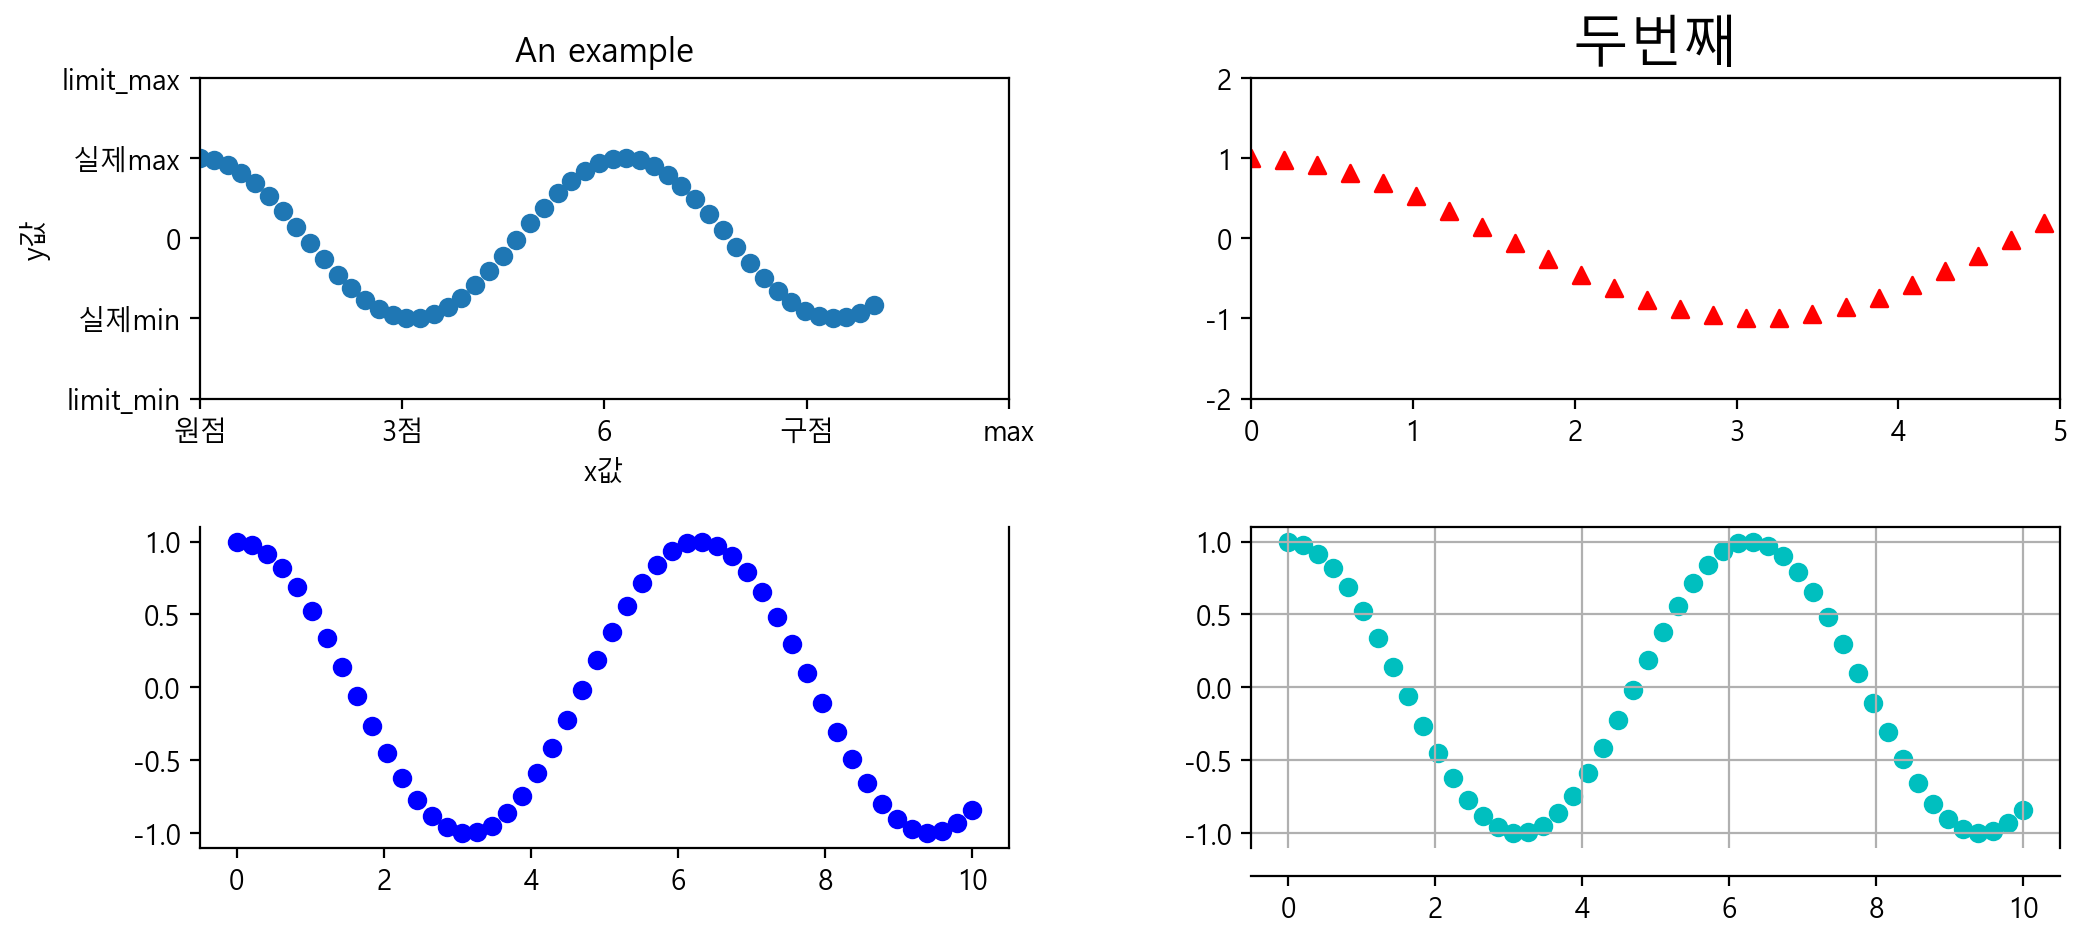

In [44]:
x = np.linspace(0, 10)  # 0, 10 까지 50개 값을 배열로 생성
y = np.cos(x)
fig, axes = plt.subplots(2, 2, figsize = (12, 5))
# 서브플롯끼리 여백 조정 (hspace : 위아래 여백, wspace : 좌우 여백)
plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
axes[0, 0].scatter(x, y)
axes[0, 0].set(title = 'An example', ylabel = 'y값', xlabel = 'x값',
               xlim = [0, 12],  # x축 눈금의 범위
               ylim = [-2, 2],  # y축 눈금의 범위
               xticks = [0, 3, 6, 9, 12],  # x축 눈금
               xticklabels = ['원점', '3점', 6, '구점', 'max'],  # x축 눈금 라벨
               yticks = [-2, -1, 0, 1, 2],  # y축 눈금
               yticklabels = ['limit_min', '실제min', 0, '실제max', 'limit_max']  # y축 눈금 라벨
              )
axes[0, 1].scatter(x, y, c = 'r', marker = '^')
axes[0, 1].set_title('두번째', fontsize = 20)
axes[0, 1].set_xlim(0, 5)  # set(xlim = [0, 5])
axes[0, 1].set_ylim(-2, 2)  # set(ylim = [-2, 2])
axes[1, 0].scatter(x, y, c = 'b')
axes[1, 0].spines['top'].set_visible(False)
axes[1, 1].scatter(x, y, c = 'c')
axes[1, 1].spines['bottom'].set_position(('outward', 10))
axes[1, 1].grid(True)